In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [163]:
df = pd.read_excel(r"C:\Users\dell\Downloads\Copy of loan1.xlsx")

In [164]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [167]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [168]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

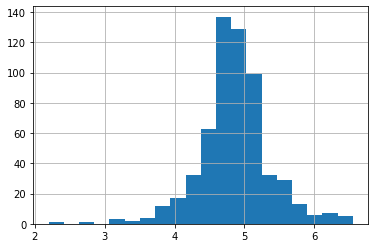

In [169]:
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

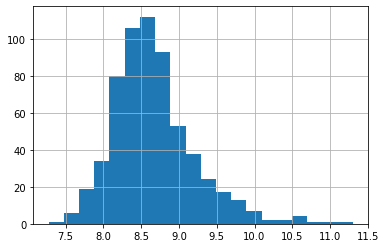

In [170]:
df['TotalIncome']= df['ApplicantIncome']+ df['CoapplicantIncome']

df['TotalIncome_log']= np.log(df['TotalIncome'])

df['TotalIncome_log'].hist(bins=20)

In [171]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)



In [172]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [173]:
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

In [174]:
df['Loan_Amount_Term'].fillna(df[ 'Loan_Amount_Term'].mode()[0], inplace = True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)


In [175]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [176]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [177]:
categorical = ['Gender','Married','Education','Property_Area','Self_Employed']
df = pd.get_dummies(df, columns=categorical, drop_first=False)
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,loanAmount_log,TotalIncome,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,LP001002,0.0,5849,0.0,146.412162,360.0,1.0,Y,4.857444,5849.0,...,1,1,0,1,0,0,0,1,1,0
1,LP001003,1.0,4583,1508.0,128.000000,360.0,1.0,N,4.852030,6091.0,...,1,0,1,1,0,1,0,0,1,0
2,LP001005,0.0,3000,0.0,66.000000,360.0,1.0,Y,4.189655,3000.0,...,1,0,1,1,0,0,0,1,0,1
3,LP001006,0.0,2583,2358.0,120.000000,360.0,1.0,Y,4.787492,4941.0,...,1,0,1,0,1,0,0,1,1,0
4,LP001008,0.0,6000,0.0,141.000000,360.0,1.0,Y,4.948760,6000.0,...,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,2900,0.0,71.000000,360.0,1.0,Y,4.262680,2900.0,...,0,1,0,1,0,1,0,0,1,0
610,LP002979,3.0,4106,0.0,40.000000,180.0,1.0,Y,3.688879,4106.0,...,1,0,1,1,0,1,0,0,1,0
611,LP002983,1.0,8072,240.0,253.000000,360.0,1.0,Y,5.533389,8312.0,...,1,0,1,1,0,0,0,1,1,0
612,LP002984,2.0,7583,0.0,187.000000,360.0,1.0,Y,5.231109,7583.0,...,1,0,1,1,0,0,0,1,1,0


In [178]:
column_to_move = 'Loan_Status'

# Move the selected column to the last position
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]

# Display the DataFrame after moving the column
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loanAmount_log,TotalIncome,TotalIncome_log,...,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes,Loan_Status
0,LP001002,0.0,5849,0.0,146.412162,360.0,1.0,4.857444,5849.0,8.674026,...,1,0,1,0,0,0,1,1,0,Y
1,LP001003,1.0,4583,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,...,0,1,1,0,1,0,0,1,0,N
2,LP001005,0.0,3000,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,...,0,1,1,0,0,0,1,0,1,Y
3,LP001006,0.0,2583,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,...,0,1,0,1,0,0,1,1,0,Y
4,LP001008,0.0,6000,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,...,1,0,1,0,0,0,1,1,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,2900,0.0,71.000000,360.0,1.0,4.262680,2900.0,7.972466,...,1,0,1,0,1,0,0,1,0,Y
610,LP002979,3.0,4106,0.0,40.000000,180.0,1.0,3.688879,4106.0,8.320205,...,0,1,1,0,1,0,0,1,0,Y
611,LP002983,1.0,8072,240.0,253.000000,360.0,1.0,5.533389,8312.0,9.025456,...,0,1,1,0,0,0,1,1,0,Y
612,LP002984,2.0,7583,0.0,187.000000,360.0,1.0,5.231109,7583.0,8.933664,...,0,1,1,0,0,0,1,1,0,Y


In [179]:
X=df.iloc[:,1:21]

In [180]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loanAmount_log,TotalIncome,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,0.0,5849,0.0,146.412162,360.0,1.0,4.857444,5849.0,8.674026,0,1,1,0,1,0,0,0,1,1,0
1,1.0,4583,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,0,1,0,1,1,0,1,0,0,1,0
2,0.0,3000,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,0,1,0,1,1,0,0,0,1,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,0,1,0,1,0,1,0,0,1,1,0
4,0.0,6000,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,0,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.000000,360.0,1.0,4.262680,2900.0,7.972466,1,0,1,0,1,0,1,0,0,1,0
610,3.0,4106,0.0,40.000000,180.0,1.0,3.688879,4106.0,8.320205,0,1,0,1,1,0,1,0,0,1,0
611,1.0,8072,240.0,253.000000,360.0,1.0,5.533389,8312.0,9.025456,0,1,0,1,1,0,0,0,1,1,0
612,2.0,7583,0.0,187.000000,360.0,1.0,5.231109,7583.0,8.933664,0,1,0,1,1,0,0,0,1,1,0


In [181]:
Y=df.iloc[:,21:]

In [182]:
Y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [183]:
#spliting the data into train and test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [184]:
X_train.shape 

(491, 20)

In [185]:
y_train.shape

(491, 1)

In [186]:
X_test.shape

(123, 20)

In [187]:
y_test.shape

(123, 1)

# KNN

In [188]:
#applying knn

# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9,11,13]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print("training accuracy is",modelknn.score(X_train,y_train))
print("testing accuracy is ",modelknn.score(X_test,y_test))

KNeighborsClassifier(n_neighbors=11)
training accuracy is 0.7209775967413442
testing accuracy is  0.5853658536585366


# NAIVE BAYES

In [189]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [190]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.7886178861788617


# DT

In [197]:
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6]}]

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=42)


dtmodel=GridSearchCV(clf,tuned_parameters)

dtmodel.fit(X_train,y_train)

print(dtmodel.best_estimator_)
print(dtmodel.score(X_test,y_test))
print(dtmodel.score(X_train,y_train))

DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)
0.7723577235772358
0.835030549898167


In [198]:
#PREDICTIONS
dt_test_prediction=dtmodel.predict(X_test)#this is your y_pred_test
dt_train_predictions=dtmodel.predict(X_train)#y_pred_train

In [199]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_dt_p_test=precision_score(y_test,dt_test_prediction,average='weighted')
print("The precision of x_dt_p for testing data",x_dt_p_test)

The precision of x_dt_p for testing data 0.7831035701661364


In [200]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_dt_r_test=recall_score(y_test,dt_test_prediction,average='weighted')
print("The recall of test data for Decison Tree is",x_dt_r_test)

The recall of test data for Decison Tree is 0.7723577235772358


In [201]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,dt_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,dt_test_prediction)

print("testing accuracy is",b)

training accuracy is 0.835030549898167
testing accuracy is 0.7723577235772358


# random forest

In [191]:
#Training random forest after applying SMOTE technique.
#here we are using GridSearchCV to tune the hyperparamters we have in randomforest to see which 
# parameters works best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc=RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [192]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 4, 'n_estimators': 200}


In [193]:
#training the random forest model
rfc_new=RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,y_train)

In [194]:
#predictions
rf_predictions_test=random_forest_model.predict(X_test)
rf_predictions_train=random_forest_model.predict(X_train)

In [195]:
#evaluation of random forest with smote
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,rf_predictions_test,average='weighted')
print("Testing f1 score is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,rf_predictions_train,average='weighted')
print("Training f1 score is",X_train_F1score) #f1 score on train data

Testing f1 score is 0.7724190746981632
Training f1 score is 0.838954420956528


In [202]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,dt_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,dt_test_prediction)

print("testing accuracy is",b)

training accuracy is 0.835030549898167
testing accuracy is 0.7723577235772358


# LOGISTIC 

In [203]:
#we are using simple gridsearchcv to tune the hyperparameter C
#here we are not using smote samples

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

LRmodel=GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),tuned_parameters)

LRmodel.fit(X_train,y_train)

print(LRmodel.best_estimator_)
print(LRmodel.score(X_test,y_test))
print(LRmodel.score(X_train,y_train))

#this is accuracy 

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=400)
0.6097560975609756
0.5478615071283096


In [204]:
#PREDICTIONS
LR_test_prediction=LRmodel.predict(X_test)#this is your y_pred_test
LR_train_predictions=LRmodel.predict(X_train)#y_pred_train

In [205]:
#evaluation
from sklearn.metrics import f1_score
X_LRtest_F1score=f1_score(y_test,LR_test_prediction,average='weighted')
print("Testing f1 score is",X_LRtest_F1score) #f1 score on test data

X_LRtrain_F1score=f1_score(y_train,LR_train_predictions,average='weighted')
print("Training f1 score is",X_LRtrain_F1score) #f1 score on train data

Testing f1 score is 0.6075192497956725
Training f1 score is 0.5617920335225575


In [206]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_LR_p_test=precision_score(y_test,LR_test_prediction,average='weighted')
print("The precision of x_LR_p for testing data",x_LR_p_test)

The precision of x_LR_p for testing data 0.6055919095776323


In [207]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_LR_r_test=recall_score(y_test,LR_test_prediction,average='weighted')
print("The recall of test data for Logistic Regression is",x_LR_r_test)

The recall of test data for Logistic Regression is 0.6097560975609756


In [208]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,LR_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,LR_test_prediction)

print("testing accuracy is",b)

training accuracy is 0.5478615071283096
testing accuracy is 0.6097560975609756
